<a href="https://colab.research.google.com/github/nataliatasso/WMC_notebooks/blob/main/%5BNOTEBOOK_7%5D_Probability.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Estatística- Probabilidade e Amostragem Desafio Final

## Considerando a base de dados de populacao_brasileira.json responda as questões abaixo (os dados são fictícios).

### Você é uma pesquisadora desenvolvendo uma análise sobre as características da força de trabalho nos estados brasileiros. Responda as perguntas abaixo:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stat
from scipy.stats import geom
from scipy.stats import norm
from scipy import stats

In [ ]:
df_populacao_br = pd.read_csv('populacao_brasileira.csv', index_col = 0)
df_populacao_br.columns

Index(['estado', 'idade', 'escolaridade', 'nível de proficiência em inglês',
       'renda', 'sexo'],
      dtype='object')

In [ ]:
df_populacao_br.head()

,estado,idade,escolaridade,nível de proficiência em inglês,renda,sexo
0,MA,56,Fundamental,Intermediário,4006.29,F
1,BA,46,Superior,Básico,2423.11,M
2,AM,32,Fundamental,Intermediário,3835.69,M
3,CE,60,Superior,Básico,1870.29,M
4,SE,25,Fundamental,Avançado,3529.80,M


1. Considere pessoas fluentes em inglês, qual a probabilidade complementar? Ou seja, qual a probabilidade de escolhermos uma pessoa aleatória e ela não ser fluente em inglês. Considere fluente quem tem o nível avançado.

In [ ]:
# Contar o total de pessoas e o total de fluentes em inglês
total_pessoas = len(df_populacao_br)
total_fluentes = len(df_populacao_br[df_populacao_br['nível de proficiência em inglês'] == 'Avançado'])

# Calcular a probabilidade de fluentes
probabilidade_fluente = total_fluentes / total_pessoas

# Calcular a probabilidade complementar (não ser fluente)
probabilidade_complementar_flu = (1 - probabilidade_fluente)

# Exibir resultado
print(f'A probabilidade complementar de não ser fluente em inglês é de {(probabilidade_complementar_flu * 100):.2f}%')

A probabilidade complementar de não ser fluente em inglês é de 65.60%


2. Se uma pessoa escolhida aleatoriamente for de Alagoas ou do Pará, qual é a probabilidade de ela ter uma renda superior a 5 mil reais?

In [ ]:
# Filtrar o df para incluir apenas pessoas de Alagoas ou do Pará
df_al_pa = df_populacao_br[df_populacao_br['estado'].isin(['AL', 'PA'])]

# Contar o total de pessoas e o total de pessoas que ganha mais de 5k
total_al_pa = len(df_al_pa)
total_al_pa_5k = len(df_al_pa[df_al_pa['renda'] > 5000])

# Calcular a probabilidade de mais de 5k
probabilidade_al_pa_5k = total_al_pa_5k / total_al_pa

# A probabilidade de ter uma renda superior a 5 mil reais é 1 - probabilidade acumulada de obter 0 sucessos
print(f'A probabilidade de uma pessoa escolhida aleatoriamente de Alagoas ou do Pará ter uma renda superior a 5 mil reais é de {(probabilidade_al_pa_5k * 100):.2f}%')

A probabilidade de uma pessoa escolhida aleatoriamente de Alagoas ou do Pará ter uma renda superior a 5 mil reais é de 5.06%


3. Descubra a probabilidade de uma pessoa ter ensino superior completo no estado do Amazonas. Qual a probabilidade da quinta pessoa que você conversar, que é amazonense, ter ensino superior completo?

In [ ]:
# Criar um Data Frame para incluir apenas as pessoas do Amazonas
df_amazonas = df_populacao_br[df_populacao_br['estado'] == 'AM'].copy()

# Atualizar a categoria de escolaridade para considerar pós-graduação como superior
df_amazonas.loc[df_amazonas['escolaridade'] == 'Pós-graduação', 'escolaridade'] = 'Superior'

# Calcular a probabilidade de ter ensino superior completo (incluindo pós-graduação) no estado do Amazonas
total_amazonas = len(df_amazonas)
total_superior_amazonas = len(df_amazonas[df_amazonas['escolaridade'] == 'Superior'])
probabilidade_superior_amazonas = total_superior_amazonas / total_amazonas

print(f'A probabilidade de uma pessoa ter ensino superior completo no estado do Amazonas é de {(probabilidade_superior_amazonas * 100):.2f}%')

# Calcular a probabilidade de a quinta pessoa ser a primeira a ter ensino superior completo
k = 5  # A quinta pessoa
probabilidade_geo_5 = geom.pmf(k, probabilidade_superior_amazonas)

print(f'A probabilidade de a quinta pessoa que você conversar, se for amazonense, ter ensino superior completo é de {(probabilidade_geo_5 * 100):.2f}%')

A probabilidade de uma pessoa ter ensino superior completo no estado do Amazonas é de 55.26%
A probabilidade de a quinta pessoa que você conversar, se for amazonense, ter ensino superior completo é de 2.21%


4. Considerando a renda das pessoas do nosso conjunto, podemos dizer que a renda de uma pessoa brasileira está na sua maioria em que faixa (faça faixa de 1.500 reais)? Qual é a sua função densidade de probabilidade?

Faixa de renda predominante: 3000.0 - 4500.0 reais


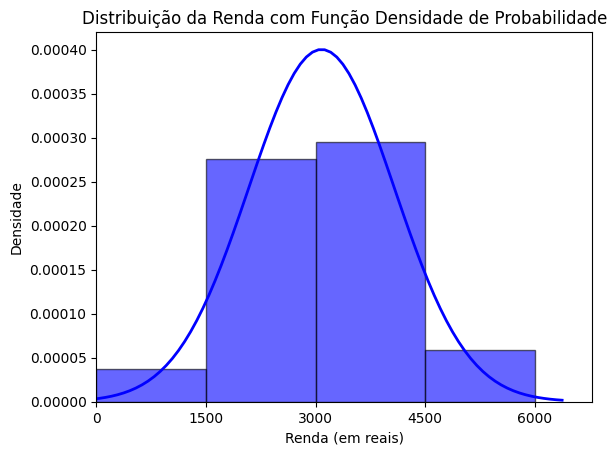

In [ ]:
# Criar faixas de renda com intervalo de 1.500 reais
intervalo = 1500
faixas_renda = np.arange(0 - intervalo, df_populacao_br['renda'].max() + intervalo, intervalo)

# Criar o histograma com as faixas de renda
contagem_por_faixa, _ = np.histogram(df_populacao_br['renda'], bins = faixas_renda)

# Identificar o índice da faixa predominante
indice_faixa_predominante = np.argmax(contagem_por_faixa)

# Determinar os limites inferior e superior da faixa predominante
limite_inferior = faixas_renda[indice_faixa_predominante]
limite_superior = faixas_renda[indice_faixa_predominante + 1]

# Exibir o resultado
print(f"Faixa de renda predominante: {limite_inferior} - {limite_superior} reais")

# Dados de renda
renda = df_populacao_br['renda']

plt.hist(renda, bins=faixas_renda, edgecolor = 'black', density = True, alpha=0.6, color = 'blue')

# Calcular a média e o desvio padrão da renda
media = renda.mean()
desvio_padrao = renda.std()

# Gerar valores de x para a função densidade de probabilidade
xmin, xmax = plt.xlim()  # Obtém os limites do eixo x
x = np.linspace(xmin, xmax, 100)

# Calcular a função densidade de probabilidade
pdf = norm.pdf(x, media, desvio_padrao)

# Plotar a curva de densidade de probabilidade
plt.plot(x, pdf, color='blue', linewidth=2)

# Adicionar título e rótulos
plt.title('Distribuição da Renda com Função Densidade de Probabilidade')
plt.xlabel('Renda (em reais)')
plt.ylabel('Densidade')

# Ajustar o limite do eixo x para começar em 0
plt.xlim(0)

# Definir os rótulos do eixo x de 1500 em 1500
plt.xticks(np.arange(0, renda.max() + 1500, 1500))

# Exibir o gráfico
plt.grid(False)
plt.show()

5. Calcule a média e a variância da renda da amostra. Depois faça a distribuição normal, inclua o gráfico.

Média da renda: 3082.54
Variância da renda: 993156.23


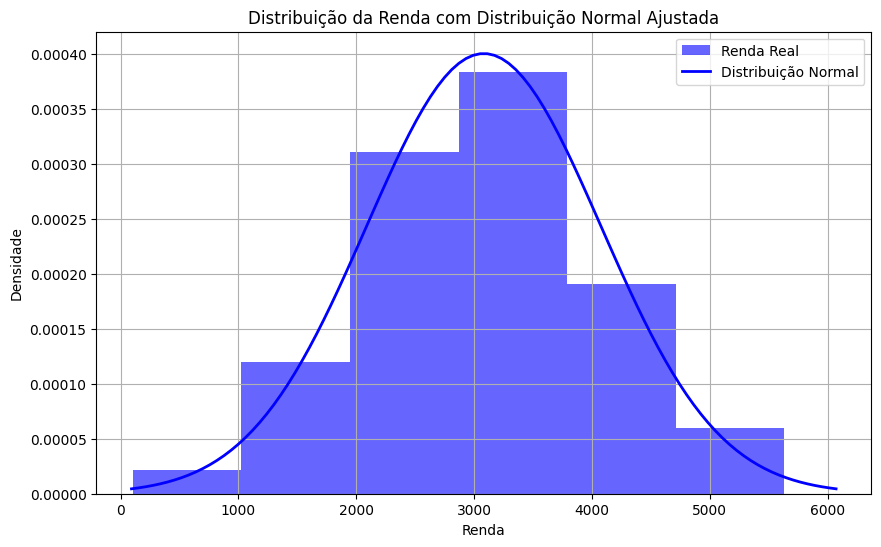

In [ ]:
# Calcular média e variância da renda
media_renda = round(df_populacao_br['renda'].mean(), 2)
variancia_renda = round(df_populacao_br['renda'].var(), 2)

# Exibir a média e variância
print(f"Média da renda: {media_renda}")
print(f"Variância da renda: {variancia_renda}")

# Gerar distribuição normal com base na média e desvio padrão
mu, sigma = media_renda, np.sqrt(variancia_renda)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
y = stats.norm.pdf(x, mu, sigma)

# Plotar o histograma de renda
plt.figure(figsize=(10, 6))
plt.hist(df_populacao_br['renda'], bins = 6, density = True, color='blue', alpha=0.6, label='Renda Real')

# Curva da distribuição normal
plt.plot(x, y, 'b-', lw = 2, label = 'Distribuição Normal')

# Adicionar rótulos e mostrar o gráfico
plt.xlabel('Renda')
plt.ylabel('Densidade')
plt.title('Distribuição da Renda com Distribuição Normal Ajustada')
plt.legend()
plt.grid(True)
plt.show()

6. Primeiro considere a probabilidade encontrada no nosso conjunto de pessoas com escolaridade de pós-graduação. Considerando a amostra de população brasileira com 1 milhão de habitantes, qual a probabilidade de encontrarmos 243 mil pessoas com pós-graduação?

In [ ]:
# Filtrar os dados para contar o número de pessoas com pós-graduação
total_pessoas = len(df_populacao_br)
pessoas_pos_graduacao = len(df_populacao_br[df_populacao_br['escolaridade'] == 'Pós-graduação'])

# Parâmetros da distribuição binomial
n = 1000000  # Número total de habitantes na amostra
k = 243000   # Número de pessoas com pós-graduação
p = pessoas_pos_graduacao / total_pessoas  # Proporção de pessoas com pós-graduação na amostra

# Calcula a probabilidade usando a distribuição binomial
probabilidade = stats.binom.pmf(k, n, p)

print(f"A probabilidade de encontrar exatamente {k} pessoas com pós-graduação em uma amostra de {n} habitantes é: {probabilidade:.6f}%")

A probabilidade de encontrar exatamente 243000 pessoas com pós-graduação em uma amostra de 1000000 habitantes é: 0.000000%


7. Somando as densidades nós temos a função de densidade acumulada. Considerando a coluna ‘Escolaridade’ faça a função de densidade acumulada discreta para cada nível de escolaridade.

In [ ]:
# Contar o número de pessoas por nível de escolaridade
contagem_escolaridade = df_populacao_br['escolaridade'].value_counts(normalize=False)

# Calcular a densidade de probabilidade discreta
total_pessoas = len(df_populacao_br)
densidade_probabilidade = contagem_escolaridade / total_pessoas

# Calcular a função de densidade acumulada discreta
funcao_densidade_acumulada = densidade_probabilidade.cumsum()

# Criar DataFrame para exibir os resultados
resultado = pd.DataFrame({
    'Densidade de Probabilidade': densidade_probabilidade,
    'Função de Densidade Acumulada': funcao_densidade_acumulada
})

# Exibir o resultado
print(resultado.sort_index())

               Densidade de Probabilidade  Função de Densidade Acumulada
escolaridade                                                            
Fundamental                         0.266                          0.266
Médio                               0.238                          1.000
Pós-graduação                       0.253                          0.519
Superior                            0.243                          0.762


8. Qual a margem de erro amostral da proporção populacional considerando a proporção de pessoas com nível de inglês intermediário?

In [ ]:
# Calcular a proporção de pessoas com nível de inglês intermediário
total_pessoas = len(df_populacao_br)
p_intermediario = len(df_populacao_br[df_populacao_br['nível de proficiência em inglês'] == 'Intermediário']) / total_pessoas

# Tamanho da amostra
n = total_pessoas

# Valor crítico para 95% de confiança (aproximadamente 1.96)
z = 1.96

# Calcular o erro padrão
erro_padrao = np.sqrt(p_intermediario * (1 - p_intermediario) / n)

# Calcular a margem de erro
margem_erro = z * erro_padrao

print(f"A margem de erro amostral da proporção para o nível de inglês intermediário é: {margem_erro:.4f}")

A margem de erro amostral da proporção para o nível de inglês intermediário é: 0.0291


9. Calcula a renda da população. Qual a probabilidade de encontrar 60 pessoas com uma renda mil reais superior à média?

In [ ]:
# Calcular a renda média e desvio padrão
media_renda = df_populacao_br['renda'].mean()
desvio_padrao_renda = df_populacao_br['renda'].std()

# Nova média para a renda 1.000 reais superior à média
nova_media = media_renda + 1000

# Número de pessoas na amostra
total_pessoas = len(df_populacao_br)

# Número de pessoas que teriam a renda 1.000 reais superior à nova média
k = 60
n = total_pessoas

# Calcular a probabilidade da nova renda
p = stats.norm.cdf(nova_media, loc = media_renda, scale = desvio_padrao_renda) - stats.norm.cdf(nova_media - 1000, loc = media_renda, scale = desvio_padrao_renda)

# Calcula a probabilidade usando a distribuição binomial
probabilidade = stats.binom.pmf(k, n, p)

print(f"A probabilidade de encontrar exatamente 60 pessoas com uma renda de {nova_media:.2f} reais é: {probabilidade:.2f}%")

A probabilidade de encontrar exatamente 60 pessoas com uma renda de 4082.54 reais é: 0.00%


In [ ]:
# Calcular a renda média e desvio padrão
media_renda = df_populacao_br['renda'].mean()
desvio_padrao_renda = df_populacao_br['renda'].std()

print(f"A renda média da população é: {media_renda:.2f}")
print(f"O desvio padrão da renda é: {desvio_padrao_renda:.2f}")

A renda média da população é: 3082.54
O desvio padrão da renda é: 996.57


10. Qual a probabilidade de escolhermos alguém do Sudeste que seja homem, com ensino fundamental e com renda maior que 2mil reais por mês?

In [ ]:
# Filtrar os dados para encontrar pessoas que atendem aos critérios
criterios = (
    (df_populacao_br['estado'] == 'SP') |
    (df_populacao_br['estado'] == 'RJ') |
    (df_populacao_br['estado'] == 'MG') |
    (df_populacao_br['estado'] == 'ES')
)
pessoas_sudeste = df_populacao_br[criterios]
pessoas_criterios = pessoas_sudeste[
    (pessoas_sudeste['sexo'] == 'M') &
    (pessoas_sudeste['escolaridade'] == 'Fundamental') &
    (pessoas_sudeste['renda'] > 2000)
]

# Calcular a probabilidade
total_pessoas = len(df_populacao_br)
pessoas_com_criterios = len(pessoas_criterios)

probabilidade = pessoas_com_criterios / total_pessoas

print(f"A probabilidade de escolher uma pessoa do Sudeste que seja homem, com ensino fundamental e com renda maior que 2 mil reais por mês é: {probabilidade:.4f}%")

A probabilidade de escolher uma pessoa do Sudeste que seja homem, com ensino fundamental e com renda maior que 2 mil reais por mês é: 0.0190%
